# Algoritmo de Clasificación


In [1]:
#Corremos librerias y EDA para traer el dataframe limpio que estaremos usando
%run ./START.ipynb
%run ./EDA.ipynb

In [2]:
#se realiza un conteo de los valores que tenemos en la variable target
new_df.APPROVED.value_counts()

1    221486
0     47315
Name: APPROVED, dtype: int64

In [3]:
# Separamos los datos en el 80% para entrenamiento y el 20% para test
x_train = new_df[:-53760]
x_test = new_df[-53760:]

# Separamos la variable target en el 80% para entrenamiento y el 20% para test
y_train = new_df.APPROVED[:-53760]
y_test = new_df.APPROVED[-53760:]

In [4]:
x_train.count()

ID                     215041
CODE_GENDER            215041
FLAG_OWN_CAR           215041
FLAG_OWN_REALTY        215041
CNT_CHILDREN           215041
AMT_INCOME_TOTAL       215041
NAME_INCOME_TYPE       215041
NAME_EDUCATION_TYPE    215041
NAME_FAMILY_STATUS     215041
NAME_HOUSING_TYPE      215041
DAYS_BIRTH             215041
AGE                    215041
DAYS_EMPLOYED          215041
YEARS_EMPLOYED         215041
FLAG_MOBIL             215041
FLAG_WORK_PHONE        215041
FLAG_PHONE             215041
FLAG_EMAIL             215041
OCCUPATION_TYPE        215041
CNT_FAM_MEMBERS        215041
APPROVED               215041
dtype: int64

In [5]:
y_train.count()

215041

In [6]:
x_test.count()

ID                     53760
CODE_GENDER            53760
FLAG_OWN_CAR           53760
FLAG_OWN_REALTY        53760
CNT_CHILDREN           53760
AMT_INCOME_TOTAL       53760
NAME_INCOME_TYPE       53760
NAME_EDUCATION_TYPE    53760
NAME_FAMILY_STATUS     53760
NAME_HOUSING_TYPE      53760
DAYS_BIRTH             53760
AGE                    53760
DAYS_EMPLOYED          53760
YEARS_EMPLOYED         53760
FLAG_MOBIL             53760
FLAG_WORK_PHONE        53760
FLAG_PHONE             53760
FLAG_EMAIL             53760
OCCUPATION_TYPE        53760
CNT_FAM_MEMBERS        53760
APPROVED               53760
dtype: int64

In [7]:
y_test.count()

53760

In [8]:
new_df.APPROVED

2         1
3         1
4         1
5         1
6         1
         ..
438541    1
438548    1
438553    1
438554    0
438556    1
Name: APPROVED, Length: 268801, dtype: int64

In [9]:
x_test = x_test.drop('APPROVED', axis=1)
x_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,AGE,DAYS_EMPLOYED,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
351020,6448822,F,Y,N,1,166500,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,-16990,47,-732,2,1,0,0,1,Accountants,2
351021,6448823,F,Y,N,1,166500,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,-16990,47,-732,2,1,0,0,1,Accountants,2
351022,6448824,F,Y,N,1,166500,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,-16990,47,-732,2,1,0,0,1,Accountants,2
351023,6448837,F,N,Y,3,135000,Working,Secondary / secondary special,Married,House / apartment,-16518,45,-457,1,1,0,0,0,Cleaning staff,5
351024,6448838,M,Y,N,1,202500,Working,Secondary / secondary special,Separated,House / apartment,-15232,42,-367,1,1,0,0,0,Laborers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500,Working,Higher education,Civil marriage,House / apartment,-13510,37,-2309,6,1,1,0,0,Laborers,2
438548,6839936,M,Y,Y,1,135000,Working,Secondary / secondary special,Married,House / apartment,-12569,34,-2095,6,1,0,0,0,Laborers,3
438553,6840222,F,N,N,0,103500,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,44,-3007,8,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000,Commercial associate,Higher education,Single / not married,With parents,-8169,22,-372,1,1,1,0,0,Sales staff,1


# **Entrenamiento**

Preprocesamiento de variables categóricas a numéricas: En nuestro dataset tenemos variables como CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE como variables con string.

Veremos qué vamos hacer con algunas de ellas: En algunos casos vamos a borrar algunas de las variables y además vamos a realizar un conocido procesamiento que se llama One Hot Encoding.

## Limpieza

In [10]:
x_train = x_train.drop('CODE_GENDER', axis=1)
x_train = x_train.drop('DAYS_BIRTH', axis=1)
x_train = x_train.drop('NAME_FAMILY_STATUS', axis=1)
x_train = x_train.drop('OCCUPATION_TYPE', axis=1)
x_train = x_train.drop('DAYS_EMPLOYED', axis=1)
x_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
2,5008806,Y,Y,0,112500,Working,Secondary / secondary special,House / apartment,59,3,1,0,0,0,2,1
3,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
4,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
5,5008810,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
6,5008811,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351015,6448815,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351016,6448816,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351017,6448817,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0
351018,6448818,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0


## Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder

#generate one hot encoder class
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#entrenamiento para generar el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(x_train[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [12]:
x_train.count()

ID                     215041
FLAG_OWN_CAR           215041
FLAG_OWN_REALTY        215041
CNT_CHILDREN           215041
AMT_INCOME_TOTAL       215041
NAME_INCOME_TYPE       215041
NAME_EDUCATION_TYPE    215041
NAME_HOUSING_TYPE      215041
AGE                    215041
YEARS_EMPLOYED         215041
FLAG_MOBIL             215041
FLAG_WORK_PHONE        215041
FLAG_PHONE             215041
FLAG_EMAIL             215041
CNT_FAM_MEMBERS        215041
APPROVED               215041
dtype: int64

In [13]:
#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(x_train[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']]), columns=encoder.get_feature_names(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']))
cat_encoding

,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215036,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215037,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215038,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
215039,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
print(cat_encoding.index.name)

None


In [15]:
cat_encoding.index.name="Col_number"

In [16]:
print(cat_encoding.index.name)

Col_number


In [17]:
cat_encoding

,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
Col_number,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215036,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215037,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215038,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
print(x_train.index.name)

None


In [19]:
x_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
2,5008806,Y,Y,0,112500,Working,Secondary / secondary special,House / apartment,59,3,1,0,0,0,2,1
3,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
4,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
5,5008810,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
6,5008811,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351015,6448815,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351016,6448816,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351017,6448817,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0
351018,6448818,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0


In [20]:
x_train.index.name="Col_number"

In [21]:
print(x_train.index.name)

Col_number


In [22]:
x_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
Col_number,,,,,,,,,,,,,,,,
2,5008806,Y,Y,0,112500,Working,Secondary / secondary special,House / apartment,59,3,1,0,0,0,2,1
3,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
4,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
5,5008810,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
6,5008811,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351015,6448815,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351016,6448816,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
351017,6448817,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0


Vemos que al hacer la limpieza de datos anterior algunas de las filas fueron eliminadas, lo que queremos hacer ahora es resetear el index para poder concatenar ambos dataframe y que no se generen valores NaN

In [23]:
x_train.reset_index(drop=True, inplace=True)

In [24]:
x_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
0,5008806,Y,Y,0,112500,Working,Secondary / secondary special,House / apartment,59,3,1,0,0,0,2,1
1,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
2,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
3,5008810,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
4,5008811,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215036,6448815,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
215037,6448816,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,1,1,1,0,2,1
215038,6448817,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0
215039,6448818,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2,0


In [25]:
#joineo de las variables que deseo con categoricas encoding
df_all_train = pd.concat([x_train, cat_encoding], axis=1)
df_all_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,...,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806,Y,Y,0,112500,Working,Secondary / secondary special,House / apartment,59,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5008810,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008811,N,Y,0,270000,Commercial associate,Secondary / secondary special,House / apartment,52,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215036,6448815,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215037,6448816,N,Y,0,166500,Commercial associate,Secondary / secondary special,House / apartment,22,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215038,6448817,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
215039,6448818,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
#Borrado de columnas innecesarias
df_all_train.drop(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'],axis=1, inplace=True)

In [27]:
x_train = df_all_train.loc[:,df_all_train.columns != 'APPROVED']

In [28]:
#train datasets final
df_all_train

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806,0,112500,59,3,1,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5008808,0,270000,52,8,1,0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5008809,0,270000,52,8,1,0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5008810,0,270000,52,8,1,0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008811,0,270000,52,8,1,0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215036,6448815,0,166500,22,2,1,1,1,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215037,6448816,0,166500,22,2,1,1,1,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
215038,6448817,1,166500,47,2,1,0,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
215039,6448818,1,166500,47,2,1,0,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Desition Tree
Ahora seleccionaremos el algoritmo basico para poder correr y entrenar un modelo

In [29]:
#spliteo de datos en target y features for test and train

#seleccion de x values sin el target
x_train = df_all_train.loc[:,df_all_train.columns != 'APPROVED']

#seleccion del target
y_train = df_all_train.APPROVED

In [30]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 5050) # con hiperparametros default
model_default.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5050)

In [31]:
#modelo generado con algun hiperparametro diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 5050, max_depth=10) 
model_max_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=5050)

### Prediccion
Ya tenemos entrenado el modelo , lo que debemos hacer es ahora transformar los datos del test de la misma manera que el train

#### Limpieza

In [32]:
x_test = x_test.drop('CODE_GENDER', axis=1)
x_test = x_test.drop('NAME_FAMILY_STATUS', axis=1)
x_test = x_test.drop('OCCUPATION_TYPE', axis=1)
x_test = x_test.drop('DAYS_BIRTH', axis=1)
x_test = x_test.drop('DAYS_EMPLOYED', axis=1)
x_test

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
351020,6448822,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351021,6448823,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351022,6448824,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351023,6448837,N,Y,3,135000,Working,Secondary / secondary special,House / apartment,45,1,1,0,0,0,5
351024,6448838,Y,N,1,202500,Working,Secondary / secondary special,House / apartment,42,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,0,202500,Working,Higher education,House / apartment,37,6,1,1,0,0,2
438548,6839936,Y,Y,1,135000,Working,Secondary / secondary special,House / apartment,34,6,1,0,0,0,3
438553,6840222,N,N,0,103500,Working,Secondary / secondary special,House / apartment,44,8,1,0,0,0,1
438554,6841878,N,N,0,54000,Commercial associate,Higher education,With parents,22,1,1,1,0,0,1


#### Enconding

In [33]:
x_test.count()

ID                     53760
FLAG_OWN_CAR           53760
FLAG_OWN_REALTY        53760
CNT_CHILDREN           53760
AMT_INCOME_TOTAL       53760
NAME_INCOME_TYPE       53760
NAME_EDUCATION_TYPE    53760
NAME_HOUSING_TYPE      53760
AGE                    53760
YEARS_EMPLOYED         53760
FLAG_MOBIL             53760
FLAG_WORK_PHONE        53760
FLAG_PHONE             53760
FLAG_EMAIL             53760
CNT_FAM_MEMBERS        53760
dtype: int64

In [34]:
#one hot encoding 
cat_encoding_test = pd.DataFrame(encoder.transform(x_test[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']]), columns=encoder.get_feature_names(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']))
cat_encoding_test

,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53756,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53757,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53758,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
#visualizamos este df para saber donde comienza el indice y conocer si debemos resetarlo
x_test

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
351020,6448822,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351021,6448823,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351022,6448824,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
351023,6448837,N,Y,3,135000,Working,Secondary / secondary special,House / apartment,45,1,1,0,0,0,5
351024,6448838,Y,N,1,202500,Working,Secondary / secondary special,House / apartment,42,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,N,Y,0,202500,Working,Higher education,House / apartment,37,6,1,1,0,0,2
438548,6839936,Y,Y,1,135000,Working,Secondary / secondary special,House / apartment,34,6,1,0,0,0,3
438553,6840222,N,N,0,103500,Working,Secondary / secondary special,House / apartment,44,8,1,0,0,0,1
438554,6841878,N,N,0,54000,Commercial associate,Higher education,With parents,22,1,1,1,0,0,1


In [36]:
#reseteo del index
x_test.reset_index(drop=True, inplace=True)

In [37]:
#comprobación
x_test

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,6448822,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
1,6448823,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
2,6448824,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,1,0,0,1,2
3,6448837,N,Y,3,135000,Working,Secondary / secondary special,House / apartment,45,1,1,0,0,0,5
4,6448838,Y,N,1,202500,Working,Secondary / secondary special,House / apartment,42,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53755,6837707,N,Y,0,202500,Working,Higher education,House / apartment,37,6,1,1,0,0,2
53756,6839936,Y,Y,1,135000,Working,Secondary / secondary special,House / apartment,34,6,1,0,0,0,3
53757,6840222,N,N,0,103500,Working,Secondary / secondary special,House / apartment,44,8,1,0,0,0,1
53758,6841878,N,N,0,54000,Commercial associate,Higher education,With parents,22,1,1,1,0,0,1


In [38]:
#joineo de las variables que deseo con categóricas encoding
df_all_test = pd.concat([x_test, cat_encoding_test], axis=1)
df_all_test

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,...,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,6448822,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6448823,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6448824,Y,N,1,166500,Commercial associate,Secondary / secondary special,Municipal apartment,47,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6448837,N,Y,3,135000,Working,Secondary / secondary special,House / apartment,45,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6448838,Y,N,1,202500,Working,Secondary / secondary special,House / apartment,42,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53755,6837707,N,Y,0,202500,Working,Higher education,House / apartment,37,6,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53756,6839936,Y,Y,1,135000,Working,Secondary / secondary special,House / apartment,34,6,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53757,6840222,N,N,0,103500,Working,Secondary / secondary special,House / apartment,44,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53758,6841878,N,N,0,54000,Commercial associate,Higher education,With parents,22,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
#borrado de las mismas variables 
df_all_test.drop(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'],axis=1, inplace=True)

In [40]:
df_all_test

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,6448822,1,166500,47,2,1,0,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6448823,1,166500,47,2,1,0,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6448824,1,166500,47,2,1,0,0,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6448837,3,135000,45,1,1,0,0,0,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6448838,1,202500,42,1,1,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53755,6837707,0,202500,37,6,1,1,0,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53756,6839936,1,135000,34,6,1,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53757,6840222,0,103500,44,8,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53758,6841878,0,54000,22,1,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
#prediccion
y_pred_test = model_max_depth.predict(df_all_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Metricas

In [42]:
y_test

351020    0
351021    0
351022    0
351023    1
351024    1
         ..
438541    1
438548    1
438553    1
438554    0
438556    1
Name: APPROVED, Length: 53760, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['NO APROBADO','APROBADO']
confusion_matrix.columns = ['PREDICCION NO APROBADO','PREDICCION APROBADO']
print(confusion_matrix)

Accuracy score for test data is: 0.9811011904761905
             PREDICCION NO APROBADO  PREDICCION APROBADO
NO APROBADO                    8790                  365
APROBADO                        651                43954


**Conclusión**

Podemos notar que tenemos un Accuracy de 98,11%. 
Podemos notar que la cantidad de falsos positivos es de 365 y los falsos negativos es de 651

<AxesSubplot:>

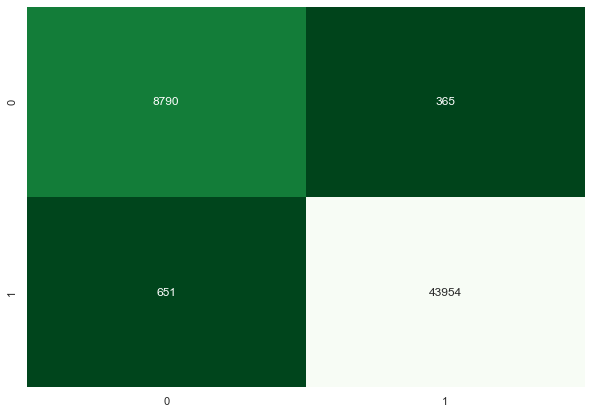

In [44]:
#Matriz De Confusión
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix (y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Greens_r', fmt='2g', cbar=None)

In [45]:
!pip install pydotplus
!pip install graphviz

import pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in df_all_train.columns if x != 'APPROVED']
tree_graph_to_png(model_max_depth, list_features, df_all_train.APPROVED.unique().astype(str), 'model.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.778092 to fit



Populating the interactive namespace from numpy and matplotlib


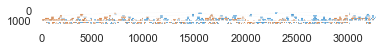

In [56]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model.png')
imgplot = plt.imshow(img)
plt.show()